In [1]:
%load_ext autoreload
%autoreload 2
import torch

from pianogen.dataset.pianorolldataset import PianoRollDataset
from pianogen.dataset.tokenized import TokenizedPianoRollDataset
from pianogen.tokenizer import PianoRollTokenizer
from torch.utils.data import DataLoader
from pianogen.model.model import SelectiveAttnTransformer

pr_ds = PianoRollDataset(r'W:\music\music-data-analysis\data', max_duration=32*150) # 150 bars
tokenizer = PianoRollTokenizer(n_pitch=88, n_velocity=32, token_seq_len=10240+1)
ds = TokenizedPianoRollDataset(pr_ds, tokenizer)
dl = DataLoader(ds,batch_size=8, shuffle=True, num_workers=8)


model = SelectiveAttnTransformer(len(tokenizer.vocab),128,256)
model.set_downsampled_path_enabled(True)
from_epoch = 40
checkpoint = torch.load(f'checkpoint/{from_epoch}.pt')
model.load_state_dict(checkpoint['model'])
model = model.cuda()

Loaded 2368 samples from 2570 songs


In [2]:
import matplotlib.pyplot as plt
song_id = 46
model.eval()
out = model(ds[song_id]['indices'][:-1].unsqueeze(0).cuda(),ds[song_id]['pos'].unsqueeze(0).cuda())

None
None


c:\Users\User\miniconda3\envs\gr\Lib\site-packages\torch\nn\functional.py:5504: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


In [3]:
tokens = tokenizer.tokenize(pr_ds.get_piano_roll(song_id))
bar_to_pos = [0]
frame_in_bar = 0
for i in range(1,len(tokens)):
    if tokens[i]['type'] == 'next_frame':
        frame_in_bar += 1
        if frame_in_bar == 32:
            bar_to_pos.append(i+1)
            frame_in_bar = 0

None


None


C:\Users\User\AppData\Local\Temp\ipykernel_7320\2658727771.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  plt.imshow((F.softmax(out.squeeze()+(ds[song_id]['output_mask'].cuda())))[bar_to_pos[25]:bar_to_pos[26]].cpu().detach().t().numpy(),aspect='auto',interpolation='none')


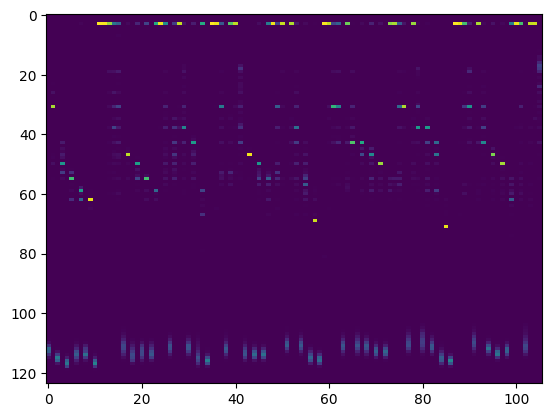

In [4]:
import torch.nn.functional as F
plt.imshow((F.softmax(out.squeeze()+(ds[song_id]['output_mask'].cuda())))[bar_to_pos[25]:bar_to_pos[26]].cpu().detach().t().numpy(),aspect='auto',interpolation='none')

In [86]:
model.set_downsampled_path_enabled(True)
jacobian = model.get_jacobian(ds[song_id]['indices'][:400].unsqueeze(0).cuda(),ds[song_id]['pos'][:400+1].unsqueeze(0).cuda(),range(0,300))

None
None
segment_len 128
x before downsample torch.Size([1, 384, 256])
x after downsample torch.Size([1, 3, 256])
x after upsample torch.Size([1, 384, 256])
x after pad torch.Size([1, 511, 256])


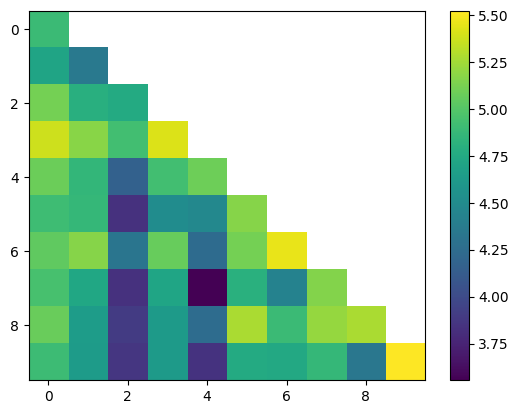

In [89]:

plt.imshow(jacobian.norm(dim=2)[:10,:10].log().cpu().detach().numpy(),aspect='auto',interpolation='none')
plt.colorbar()

In [99]:

model.test_causal()

segment_len 128
x before downsample torch.Size([1, 512, 256])
x after downsample torch.Size([1, 4, 256])
x after upsample torch.Size([1, 512, 256])
x after pad torch.Size([1, 639, 256])
test_causal passed


In [100]:
size=10
torch.triu(torch.ones(size, size), diagonal=1)

tensor([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
tokens = tokenizer.tokenize(pr_ds.get_piano_roll(song_id))
bar_to_pos = [0]
frame_in_bar = 0
for i in range(1,len(tokens)):
    if tokens[i]['type'] == 'next_frame':
        frame_in_bar += 1
        if frame_in_bar == 32:
            bar_to_pos.append(i+1)
            frame_in_bar = 0


 


None


In [25]:
tokenizer.detokenize(tokens[bar_to_pos[25]:bar_to_pos[26]]).to_midi('a.mid')

ticks per beat: 480
max tick: 0
tempo changes: 1
time sig: 0
key sig: 0
markers: 0
lyrics: False
instruments: 1

In [36]:
bar_to_pos[26]

2003

In [73]:
F.pad(torch.tensor([[1,2,3]]), (0,0,0,1), 'constant', 0)

tensor([[1, 2, 3],
        [0, 0, 0]])